# **CS 2302 Data Structures**

Author: Olac Fuentes, University of Texas at El Paso

Last modified: 2021/11/19




# **Graph Algorithms - Kruskal's and Prim's Minimum Spanning Tree Algorithms**

## **Definitions**

A **spanning tree**  of a connected, weighted, undirected graph **G=(V,E)** is a graph **G'=(V,E')** such that **G'** is connected and **E'** is a subset of **E**.

Consider the graph below:

G

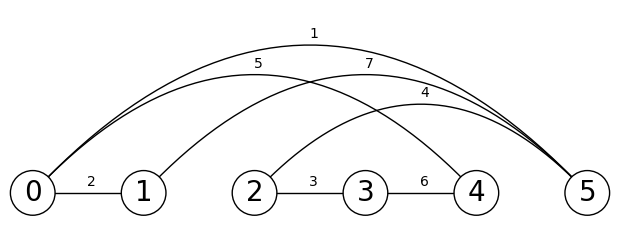

Which of the following graphs are spanning trees of G?

G1

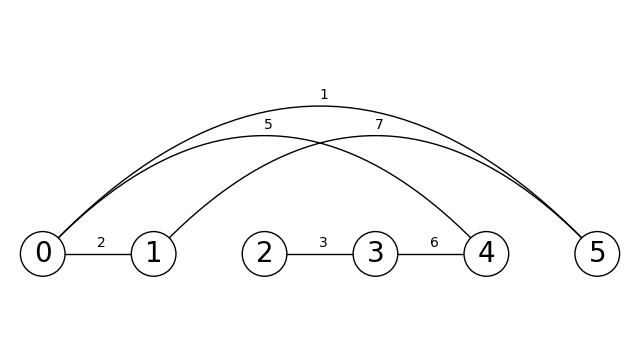

G2 

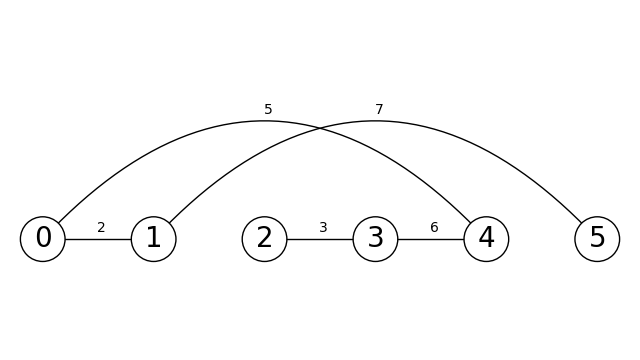

G3

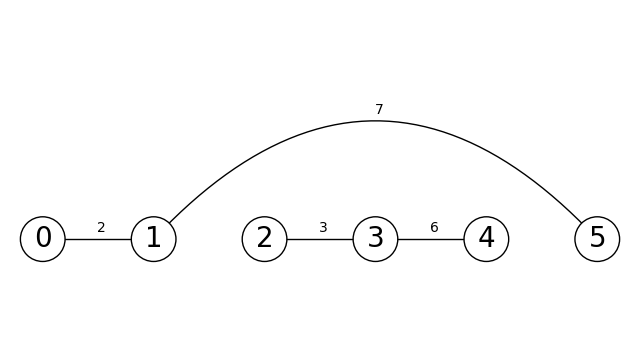

G4

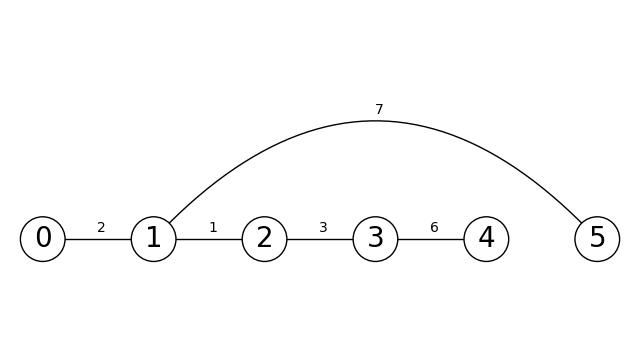

The **minimum spanning tree (MST)** is the spanning tree with minimum combined cost.

Graphs G1 and G2 are spanning trees of G; however, neither is a minimum spanning tree.

The minimum spanning tree of G is the following:

MST

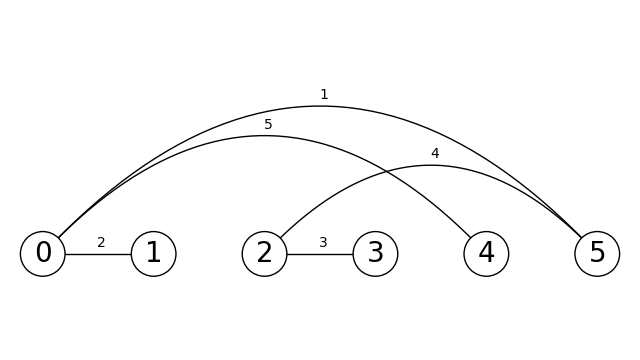

Notice that the combined cost of G1 is 24, the combined cost of G2 is 23, and the combined cost of the minimum spanning tree is 15.

## **Kruskal's Algorithm**

**Idea:**

Sort edges in ascending order by weight.

For each edge, if it does not create a cycle in MST, add it to MST. 

### **Implementation**

In practice, we don't really need to sort all edges. We will insert them to a heap and repeatedly extract the edge with minimum cost; if an edge creates a cycle, we will discard it, otherwise we will add it to the minimum spanning tree. 

In order to determine if an edge creates a cycle, we will use a disjoint set forest. 

First let's upload the graph_AL, min_heap and dsf libraries. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Let's make sure the programs are present.

In [ ]:
!ls

We will also use the following function to generate random graphs. 

In [15]:
def random_graph(nv,ne,weighted=True, directed = True,seed=-1):
    if seed>=0:
        np.random.seed(seed)
    G=graph_AL.Graph(nv,weighted=weighted, directed = directed)
    edges = set()
    ne = min(ne,nv*(nv-1)//2)
    while len(edges) < ne:
        source = np.random.randint(nv)
        dest = (np.random.randint(1,nv)+source)%nv
        if (source,dest) not in edges and (dest,source) not in edges:
            edges.add((source,dest))
    if weighted:
        w = np.random.permutation(ne) + 1
    else:
        w = np.ones(ne,dtype=np.int32)
    for i, edge in enumerate(edges):
        G.insert_edge(edge[0],edge[1],w[i])
    return G

The code for Kruskal's algorithm is as follows:

In [9]:
def kruskal(G):
    MST = graph_AL.Graph(len(G.AL),weighted=True) # MST will be stored as a graph, with the same vertices as G
    H = min_heap.min_heap()
    S = dsf.DSF(len(G.AL))
    # Insert all edges to the heap
    for v in range(len(G.AL)):
        for edge in G.AL[v]:
            if v<edge.dest: # Only insert each undirected edge once to the heap
                H.insert(min_heap.heap_record(edge.weight,[v, edge.dest,edge.weight]))
    count = 0
    while count < len(G.AL)-1 and len(H.heap)>0:
        [source, dest, weight] = H.extract_min().data
        # Check to see whether source and dest are already connected
        if S.union(source,dest)==1: #source and dest were not connected
            MST.insert_edge(source, dest, weight)       
    return MST

G representation
directed: False, weighted: True
Adjacency list:
AL[0]=[(4,7), (3,2), (5,9), (1,4)]
AL[1]=[(3,10), (5,11), (0,4), (4,6)]
AL[2]=[(4,12), (3,5), (5,3)]
AL[3]=[(1,10), (4,1), (0,2), (2,5), (5,8)]
AL[4]=[(2,12), (0,7), (3,1), (1,6)]
AL[5]=[(1,11), (0,9), (3,8), (2,3)]


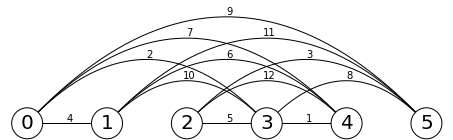

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import dsf
import graph_AL
import min_heap

seed = 2021
G1 = random_graph(6,12,weighted=True,directed = False,seed=seed)
G1.draw()
G1.display('G')

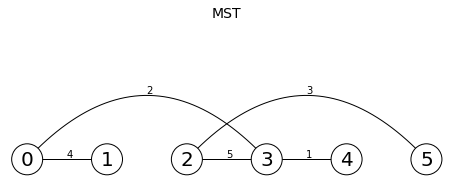

In [16]:
T = kruskal(G1)
T.draw('MST')

The following version of the algorithm can also display intermediate results to facilitate tracing. Also, it returns None if the graph has no minimum spanning tree. 

In [11]:
def kruskal(G,trace=False):
    MST = graph_AL.Graph(len(G.AL),weighted=True)
    H = min_heap.min_heap()
    S = dsf.DSF(len(G.AL))
    # Insert all edges to the heap
    for v in range(len(G.AL)):
        for edge in G.AL[v]:
            if v<edge.dest: # Only insert each undirected edge once to the heap
                H.insert(min_heap.heap_record(edge.weight,[v, edge.dest,edge.weight]))
    count = 0
    while count < len(G.AL)-1 and len(H.heap)>0:
        [source, dest, weight] = H.extract_min().data
        # Check to see whether source and dest are already connected
        if S.union(source,dest)==1:
            MST.insert_edge(source, dest, weight)
            count += 1
            if trace:
                print('Edge ({},{},{}) added to MST'.format(source, dest, weight))
                MST.draw()
        else:
            if trace:
                print('Edge ({},{},{}) NOT added to MST'.format(source, dest, weight))

    if count == len(G.AL)-1:
        return MST
    return None

Edge (3,4,1) added to MST
Edge (0,3,2) added to MST
Edge (2,5,3) added to MST
Edge (0,1,4) added to MST
Edge (2,3,5) added to MST


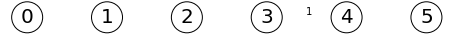

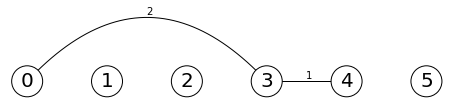

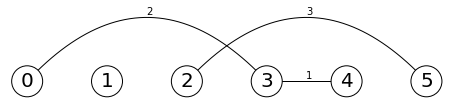

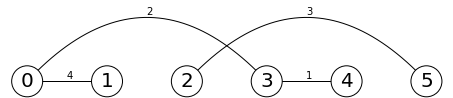

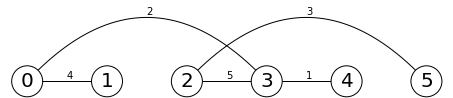

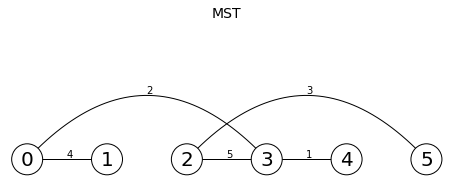

In [12]:
T = kruskal(G1, trace = True)
if T!=None:
    T.draw('MST')
else:
    print('Graph has no minimum spanning tree')   

Now let's experiment with random graphs:

G representation
directed: False, weighted: True
Adjacency list:
AL[0]=[(4,4), (2,2), (3,6), (5,1), (1,9)]
AL[1]=[(2,8), (5,5), (3,7), (4,13), (0,9)]
AL[2]=[(4,12), (1,8), (0,2), (3,10), (5,3)]
AL[3]=[(1,7), (4,11), (0,6), (2,10)]
AL[4]=[(2,12), (0,4), (3,11), (5,14), (1,13)]
AL[5]=[(1,5), (4,14), (0,1), (2,3)]
Edge (0,5,1) added to MST
Edge (0,2,2) added to MST
Edge (2,5,3) NOT added to MST
Edge (0,4,4) added to MST
Edge (1,5,5) added to MST
Edge (0,3,6) added to MST


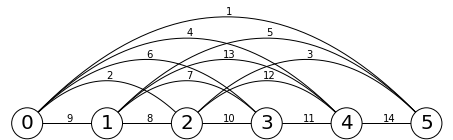

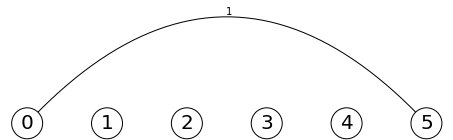

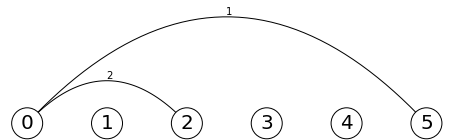

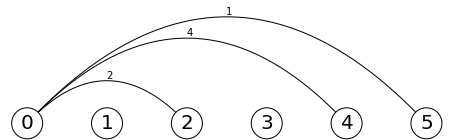

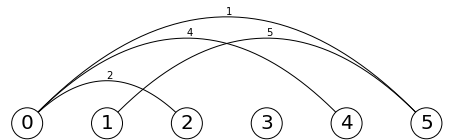

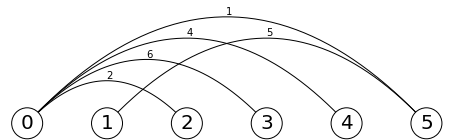

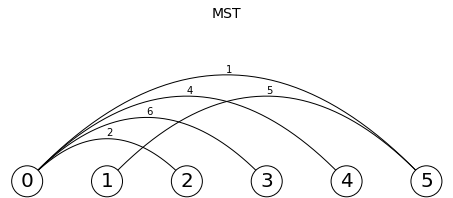

In [17]:
G1 = random_graph(6,14,weighted=True,directed = False)
G1.draw()
G1.display('G')
T = kruskal(G1, trace = True)
if T!=None:
    T.draw('MST')
else:
    print('Graph has no minimum spanning tree')  

## **Prim's Algorithm**

**Idea:**

Incrementally grow a connected component, adding one edge at a time. 

1. Start with a connected set C, containing an arbitrary vertex in V.

2. Repeat until C contains all vertices in V.

  Find the lowest cost edge (u,v) that connects a vertex u in C and a vertex v not in C.

  Add (u,v) to the MST

  Add v to C


### **Implementation**

The code for Prim's algorithm is as follows:

In [18]:
def prim(G,origin=0,trace=False):
    MST = graph_AL.Graph(len(G.AL),weighted=True)
    H = min_heap.min_heap()
    for edge in G.AL[origin]:
         H.insert(min_heap.heap_record(edge.weight,[origin, edge.dest,edge.weight]))
    C = set([origin])
    while len(C) < len(G.AL) and len(H.heap)>0:
        [source, dest, weight] = H.extract_min().data
        if dest not in C:
            new_vertex = dest      
            MST.insert_edge(source, dest, weight)
            C.add(new_vertex)
            for edge in G.AL[new_vertex]:
                if edge.dest not in C:
                    H.insert(min_heap.heap_record(edge.weight,[new_vertex,edge.dest,edge.weight]))
    return MST

G representation
directed: False, weighted: True
Adjacency list:
AL[0]=[(4,7), (3,2), (5,9), (1,4)]
AL[1]=[(3,10), (5,11), (0,4), (4,6)]
AL[2]=[(4,12), (3,5), (5,3)]
AL[3]=[(1,10), (4,1), (0,2), (2,5), (5,8)]
AL[4]=[(2,12), (0,7), (3,1), (1,6)]
AL[5]=[(1,11), (0,9), (3,8), (2,3)]


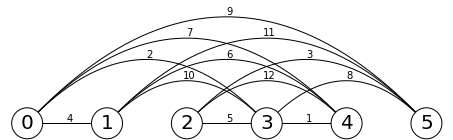

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import dsf
import graph_AL
import min_heap

seed = 2021
G1 = random_graph(6,12,weighted=True,directed = False,seed=seed)
G1.draw()
G1.display('G')

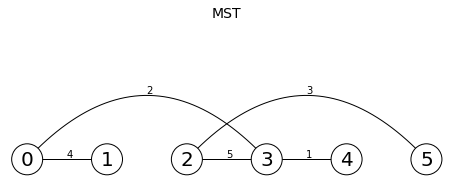

In [26]:
T = prim(G1, origin=0)
T.draw('MST')

The following version of the algorithm can also display intermediate results to facilitate tracing. Also, it returns None if the graph has no minimum spanning tree. 

In [27]:
def prim(G,origin=0,trace=False):
    MST = graph_AL.Graph(len(G.AL),weighted=True)
    H = min_heap.min_heap()
    for edge in G.AL[origin]:
         H.insert(min_heap.heap_record(edge.weight,[origin, edge.dest,edge.weight]))
    C = set([origin])
    while len(C) < len(G.AL) and len(H.heap)>0:
        [source, dest, weight] = H.extract_min().data
        if dest not in C:
            new_vertex = dest
            MST.insert_edge(source, dest, weight)
            C.add(new_vertex)
            if trace:
                print('Edge ({},{},{}) added to MST'.format(source, dest, weight))
                print('C=',C)
                MST.draw()
            for edge in G.AL[new_vertex]:
                if edge.dest not in C:
                    H.insert(min_heap.heap_record(edge.weight,[new_vertex,edge.dest,edge.weight]))
    if len(C) == len(G.AL):
        return MST
    return None

Edge (0,3,2) added to MST
C= {0, 3}
Edge (3,4,1) added to MST
C= {0, 3, 4}
Edge (0,1,4) added to MST
C= {0, 1, 3, 4}
Edge (3,2,5) added to MST
C= {0, 1, 2, 3, 4}
Edge (2,5,3) added to MST
C= {0, 1, 2, 3, 4, 5}


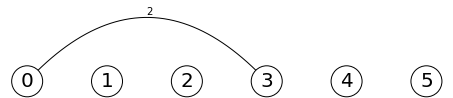

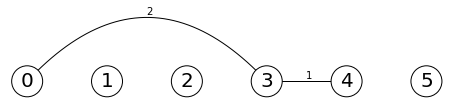

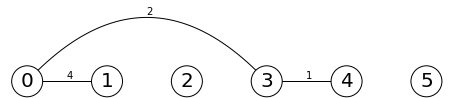

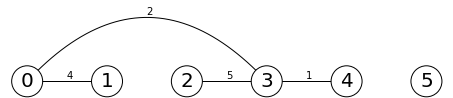

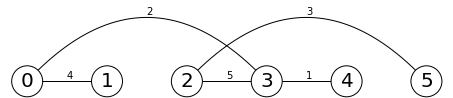

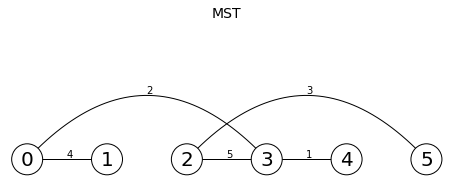

In [28]:
T = prim(G1, trace = True)
if T!=None:
    T.draw('MST')
else:
    print('Graph has no minimum spanning tree')   

Let's observe the behavior of the algorithm when the source changes.

Edge (0,3,2) added to MST
C= {0, 3}
Edge (3,4,1) added to MST
C= {0, 3, 4}
Edge (0,1,4) added to MST
C= {0, 1, 3, 4}
Edge (3,2,5) added to MST
C= {0, 1, 2, 3, 4}
Edge (2,5,3) added to MST
C= {0, 1, 2, 3, 4, 5}


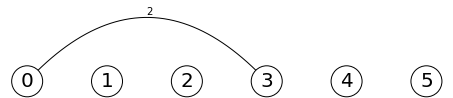

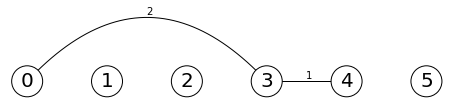

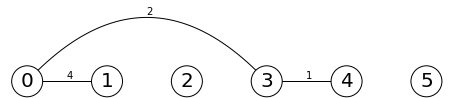

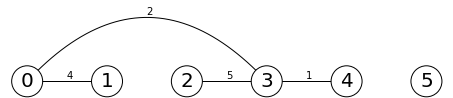

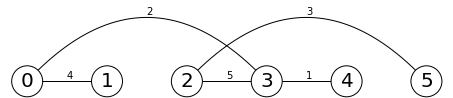

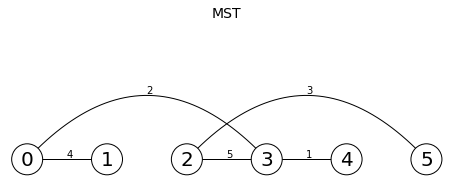

In [30]:
T = prim(G1, origin = 5, trace = True)
if T!=None:
    T.draw('MST')
else:
    print('Graph has no minimum spanning tree')  

Now let's experiment with random graphs:

G representation
directed: False, weighted: True
Adjacency list:
AL[0]=[(4,4), (2,2), (3,6), (5,1), (1,9)]
AL[1]=[(2,8), (5,5), (3,7), (4,13), (0,9)]
AL[2]=[(4,12), (1,8), (0,2), (3,10), (5,3)]
AL[3]=[(1,7), (4,11), (0,6), (2,10)]
AL[4]=[(2,12), (0,4), (3,11), (5,14), (1,13)]
AL[5]=[(1,5), (4,14), (0,1), (2,3)]
Edge (0,5,1) added to MST
C= {0, 5}
Edge (0,2,2) added to MST
C= {0, 2, 5}
Edge (0,4,4) added to MST
C= {0, 2, 4, 5}
Edge (5,1,5) added to MST
C= {0, 1, 2, 4, 5}
Edge (0,3,6) added to MST
C= {0, 1, 2, 3, 4, 5}


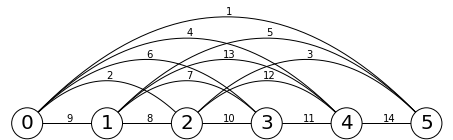

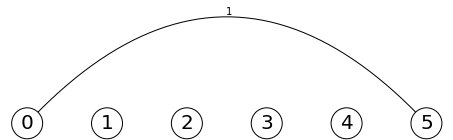

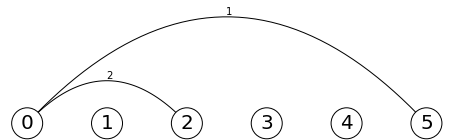

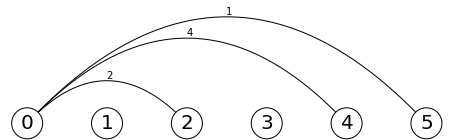

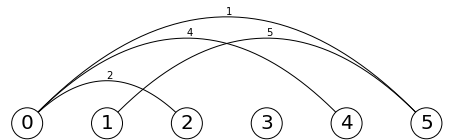

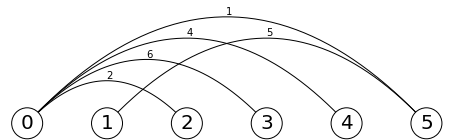

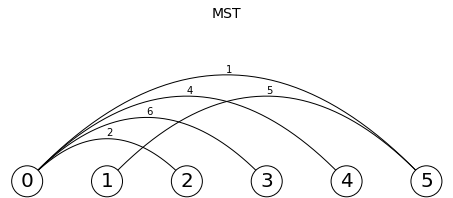

In [31]:
G1 = random_graph(6,14,weighted=True,directed = False)
G1.draw()
G1.display('G')
T = prim(G1, trace = True)
if T!=None:
    T.draw('MST')
else:
    print('Graph has no minimum spanning tree')  

## **Exercises**

**Exercise 1.** A maximum spanning tree is a spanning tree of a weighted graph having maximum weight. Write the function maximum_spanning_tree(G) that receives a weighted graph G represented as an adjacency list and returns its maximum spanning tree, also represented as an adjacency list. Hint: this can be done with a MINOR modification to Kruskal’s algorithm.     

In [ ]:
def maximum_spanning_tree(G):
    T = kruskal(G1, trace = True)
    if T!=None:
        T.draw('MST')
    else:
        print('Graph has no minimum spanning tree')

**Exercise 2.**	Modify the Prim MST function to return the sum of the weights in the MST, in addition to the graph encoding the MST.

In [ ]:
T = prim(G1,trace = True)
if T!=None:
    T
else:
    print('Graph has no minimum spanning tree')  